# Telcom Industry Churn Analysis 

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/saw101/Customer_Churn_Analysis/main/Telco-Customer-Churn.csv")

In [4]:
data.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


###  Data Cleaning

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

###### Notice that TotalCharges column is of object datatype, I figured out this column has some blank spaces which has caused python to forced it as object. Let's fix this

In [6]:
# Replace blank with np.nan
data['TotalCharges'] = data['TotalCharges'].replace(' ',np.nan)

# convert to float
data['TotalCharges'] = data['TotalCharges'].astype('float64')


#### Missing values - visualization

<AxesSubplot:>

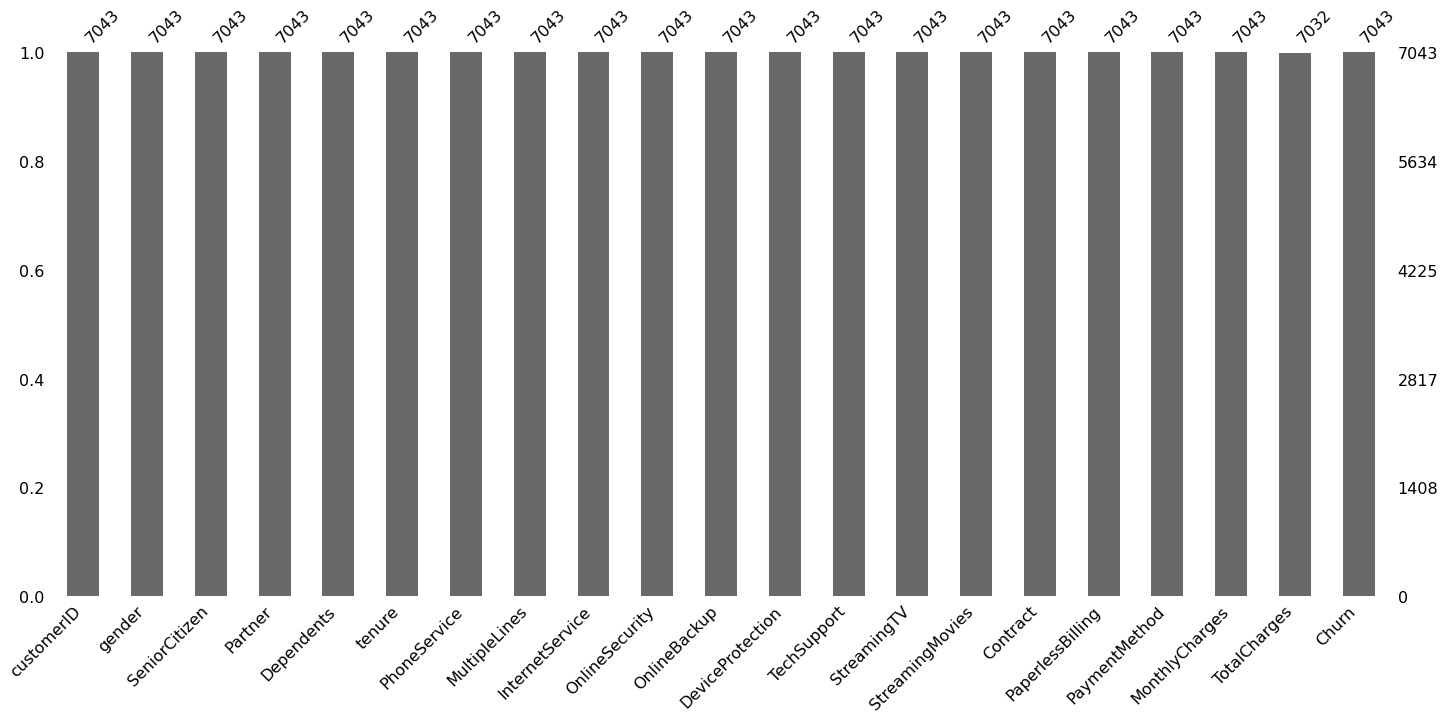

In [8]:
import missingno as msno
msno.bar(data)

<AxesSubplot:>

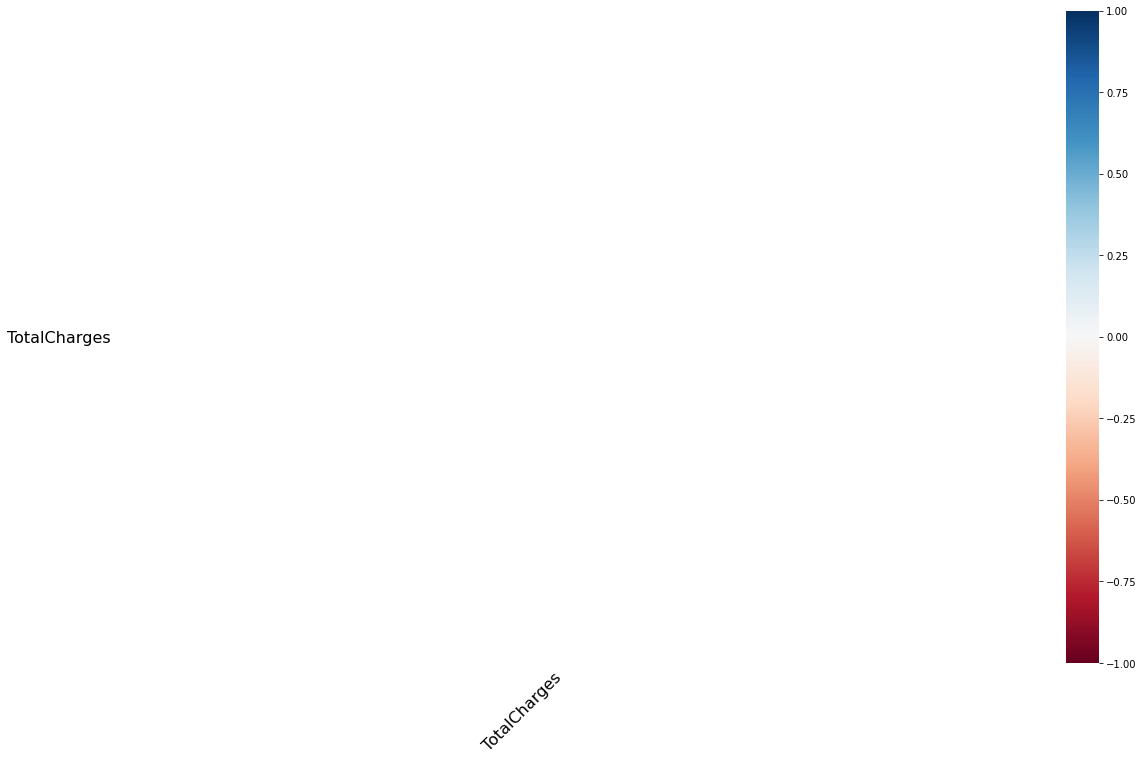

In [10]:
msno.heatmap(data)

In [13]:
# Both from the above visualization and with isnull method we can see that TotalCharges column has missing values, let's check these records
data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
data.loc[data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [15]:
# make a copy of the dataframe to be fed later to pycaret ML pipeline
data_py = data.copy()

Since the % of these records compared to total dataset is very low i.e 0.15%, it is safe to ignore them from further processing.

In [16]:
# Removing missing values 
data.dropna(how = 'any', inplace=True)
data.fillna(0)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


Divide customers into bins based on tenure e.g. for tenure < 12 months: assign a tenure group if 1-12, for tenure between 1 to 2 Yrs, tenure group of 13-24; so on...

In [19]:
data['tenure'].max()

72

In [20]:
# Groupping the tenure into bins of 12 months
labels = ['{0} - {1}'.format(i , i+11) for i in range(1,72,12)]
data['tenure_group'] = pd.cut(data.tenure, range(1,80,12), right=False , labels=labels)

In [21]:
data['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64

 Remove the columns that are  not required for processing

In [22]:
# Drop columns customerID and tenure
data.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
data.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


### Data Exploration

#### Unvaiate Analysis

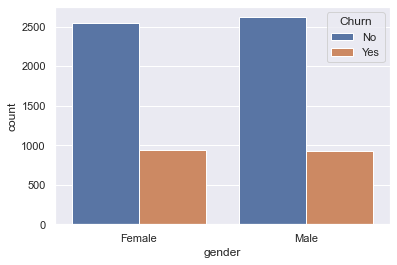

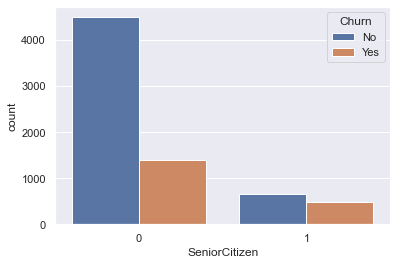

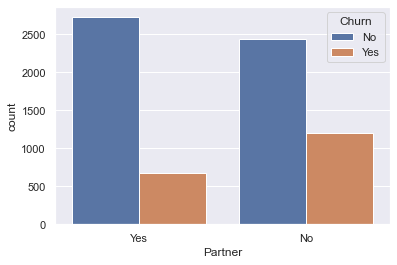

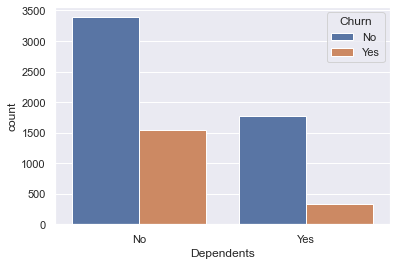

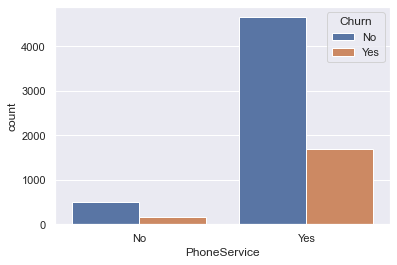

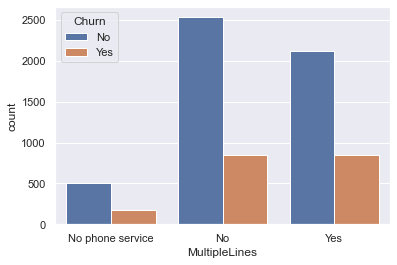

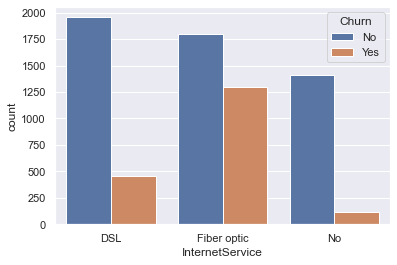

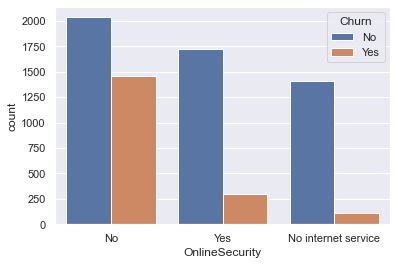

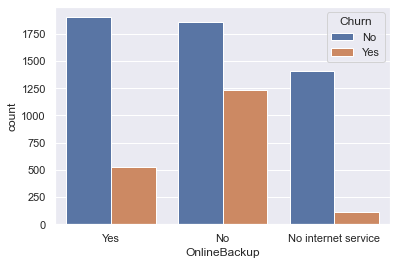

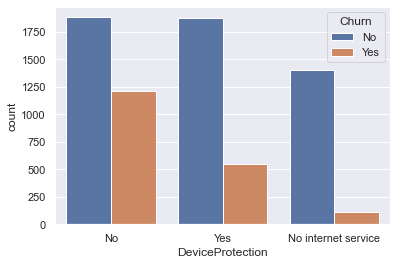

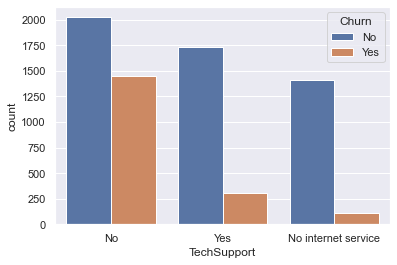

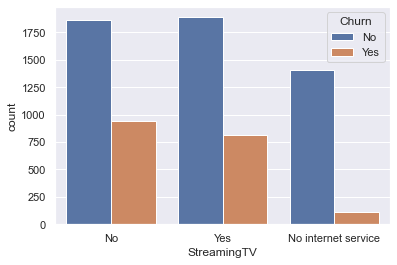

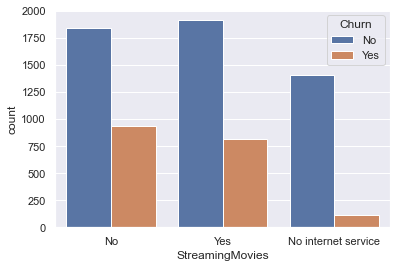

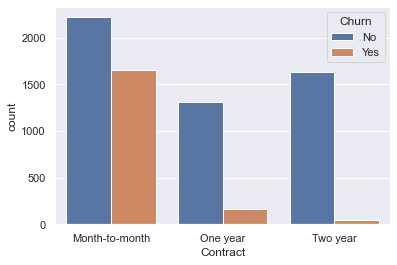

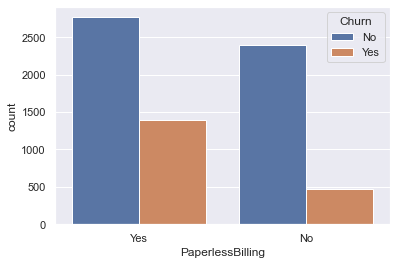

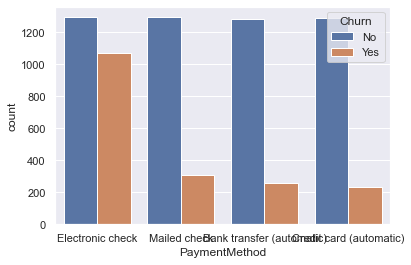

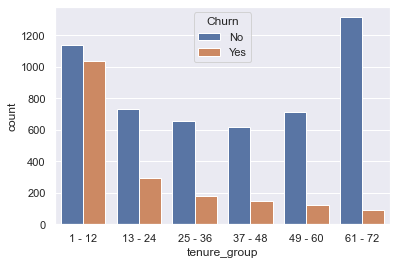

In [24]:
# Plot distibution of individual predictors by churn
for i , predictor in enumerate(data.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.set_theme(style="darkgrid")
    sns.countplot(data=data , x=predictor, hue='Churn')

Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [25]:
data['Churn'] = np.where(data['Churn']=='Yes',1,0)

Convert all the categorical variables into dummy variables

In [26]:
data_dummies = pd.get_dummies(data)
data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


Relationship between Monthly Charges and Total Charges

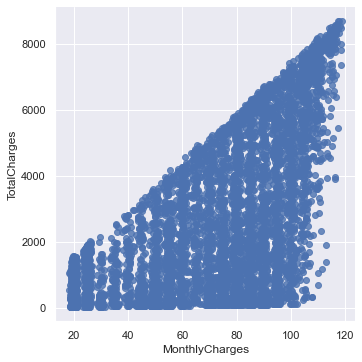

In [27]:
sns.lmplot(data=data_dummies , x = 'MonthlyCharges',y='TotalCharges', palette='pastel',fit_reg=False)

As expected, Total Charges and Monthly Charges positively correlated

Text(0.5, 1.0, 'Monthly charges by churn')

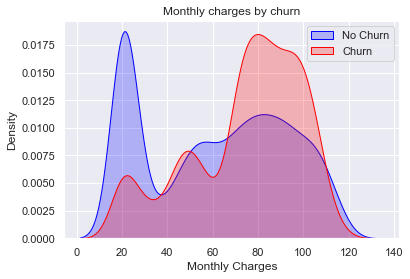

In [28]:
Mth = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 0) ],
                color="Blue", shade = True)
Mth = sns.kdeplot(data_dummies.MonthlyCharges[(data_dummies["Churn"] == 1) ],
                color="Red", shade = True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

Churn is high when monthly charges are high

Text(0.5, 1.0, 'Total charges by churn')

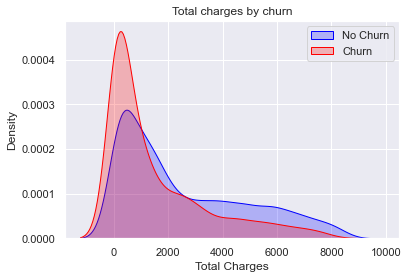

In [29]:
Tot = sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"] == 0) ],
                color="Blue", shade = True)
Tot = sns.kdeplot(data_dummies.TotalCharges[(data_dummies["Churn"] == 1) ],
                 color="Red", shade= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')

Surprising insight as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is a bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

Build a corelation of all predictors with 'Churn'

<AxesSubplot:>

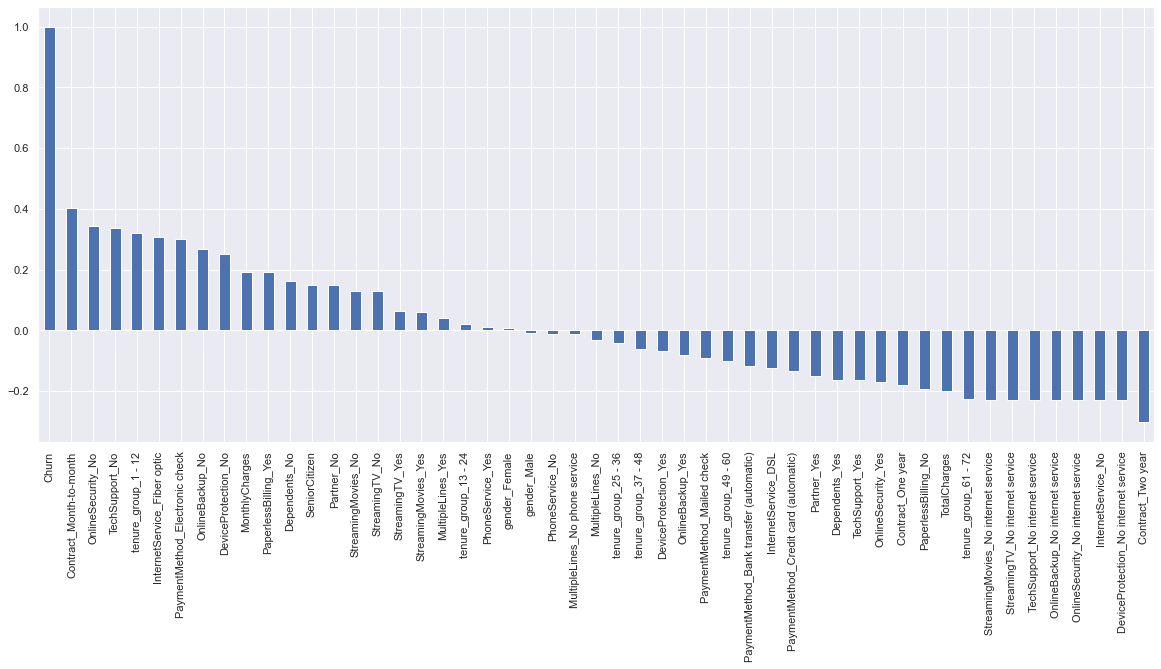

In [30]:
plt.figure(figsize=(20,8))
data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

Derived Insight:

HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and no. of multiple lines have alomost NO impact on Churn

#### Bivariate Analysis

In [31]:
new_df_target0 = data.loc[data["Churn"]==0]
new_df_target1 = data.loc[data["Churn"]==1]

In [40]:
def uniplot(df,col,title,hue=None):
    
    sns.set_theme(style="darkgrid")
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.xticks(rotation=45)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright')
    plt.show()

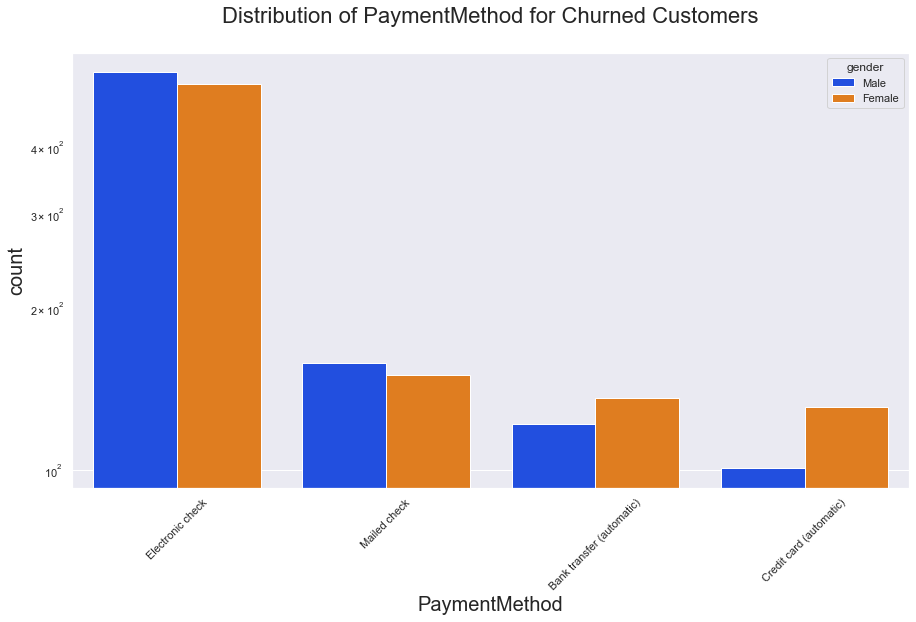

In [41]:
uniplot(new_df_target1,col='PaymentMethod',title='Distribution of PaymentMethod for Churned Customers',hue='gender')


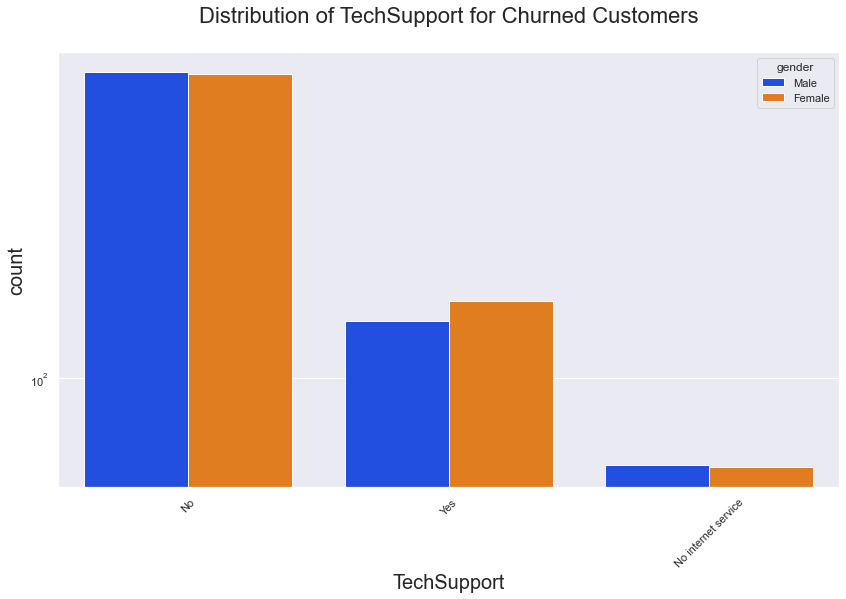

In [36]:
uniplot(new_df_target1,col='TechSupport',title='Distribution of TechSupport for Churned Customers',hue='gender')


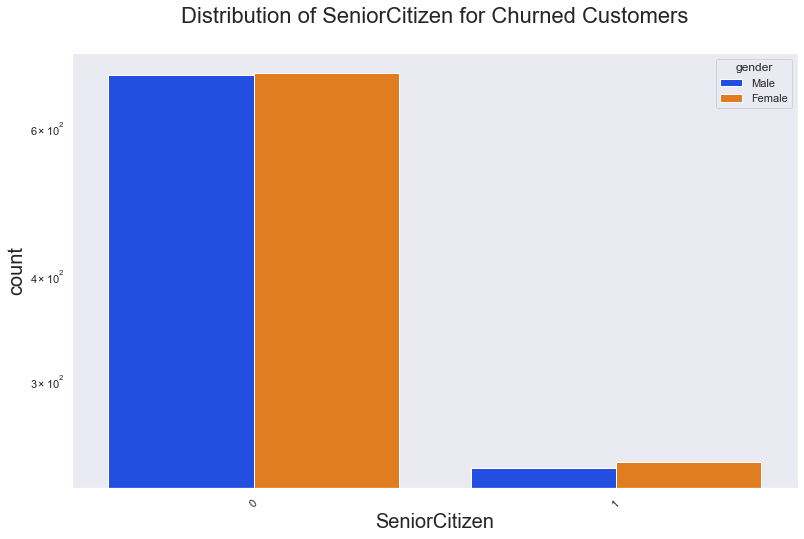

In [37]:
uniplot(new_df_target1,col='SeniorCitizen',title='Distribution of SeniorCitizen for Churned Customers',hue='gender')

#### Conclusions:
1. Electronic check medium are the highest churners
2. No Online security, No Tech Support category are high churners
3. Non senior Citizens are high churners

## Developing a Machine Learning Model using pycaret 

In [60]:
# import library
from pycaret.classification import *
s = setup(data_py, target = 'Churn', ignore_features = ['customerID'])

,Description,Value
0,session_id,1890
1,Target,Churn
2,Target Type,Binary
3,Label Encoded,"No: 0, Yes: 1"
4,Original Data,"(7043, 21)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,16
8,Ordinal Features,False
9,High Cardinality Features,False


### Model Training and Selection

In [61]:
#Now by using compare_models functionality we'll train all the algorithms available in
#the model library and evaluates multiple performance metrics using cross-validation
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8032,0.8481,0.5167,0.6592,0.5791,0.4532,0.4590,0.3290
lr,Logistic Regression,0.8057,0.8475,0.5500,0.6544,0.5973,0.4705,0.4738,0.4630
ada,Ada Boost Classifier,0.8016,0.8472,0.5337,0.6486,0.5851,0.4564,0.4605,0.1220
catboost,CatBoost Classifier,0.8012,0.8438,0.5074,0.6561,0.5721,0.4454,0.4517,2.4070
lda,Linear Discriminant Analysis,0.8020,0.8400,0.5585,0.6405,0.5963,0.4660,0.4682,0.0190
lightgbm,Light Gradient Boosting Machine,0.7976,0.8382,0.5213,0.6404,0.5746,0.4435,0.4477,0.1300
nb,Naive Bayes,0.7446,0.8323,0.7800,0.5083,0.6154,0.4368,0.4593,0.0110
rf,Random Forest Classifier,0.7953,0.8316,0.4942,0.6431,0.5585,0.4283,0.4349,0.2890
xgboost,Extreme Gradient Boosting,0.7848,0.8264,0.5105,0.6062,0.5539,0.4135,0.4164,0.5720
et,Extra Trees Classifier,0.7779,0.8048,0.4826,0.5935,0.5321,0.3886,0.3922,0.2850


AUC represents the degree or measure of separability, meaning Higher the AUC, the better the model is at predicting 0s as 0s and 1s as 1s. 
By analogy, the Higher the AUC, the better the model is at distinguishing between Churners with churn and no churn.
##### The best model based on AUC is Gradient Boosting Classifier . AUC using 10-fold cross-validation is 0.8438

In [62]:
# print best_model parameters
print(best_model)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1890, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)


### Hyperparameter Tuning
A hyperparameter is a parameter whose value is set before the learning process begins

In [63]:
tuned_best_model = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7769,0.8263,0.4186,0.6067,0.4954,0.3583,0.3685
1,0.7992,0.8513,0.4729,0.6630,0.5520,0.4273,0.4374
2,0.7911,0.8203,0.4651,0.6383,0.5381,0.4074,0.4159
3,0.7951,0.8547,0.4651,0.6522,0.5430,0.4157,0.4256
4,0.7972,0.8515,0.4961,0.6465,0.5614,0.4324,0.4388
5,0.8276,0.8655,0.5349,0.7340,0.6188,0.5110,0.5216
6,0.8215,0.8629,0.5194,0.7204,0.6036,0.4923,0.5033
7,0.8114,0.8740,0.4961,0.6957,0.5792,0.4620,0.4729
8,0.8235,0.8641,0.4961,0.7442,0.5953,0.4882,0.5046
9,0.7931,0.8406,0.4385,0.6628,0.5278,0.4023,0.4163


AUC has slightly increased from 0.8481 to 0.8511

### Model Analysis

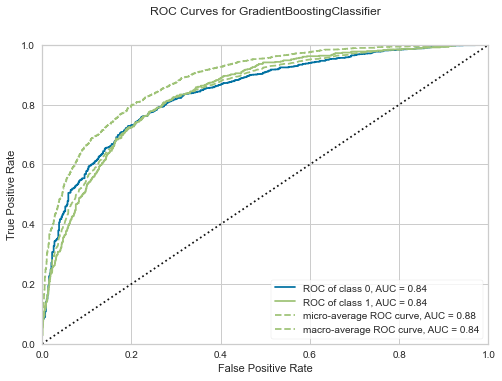

In [64]:
# AUC plot
plot_model(tuned_best_model,plot='auc')

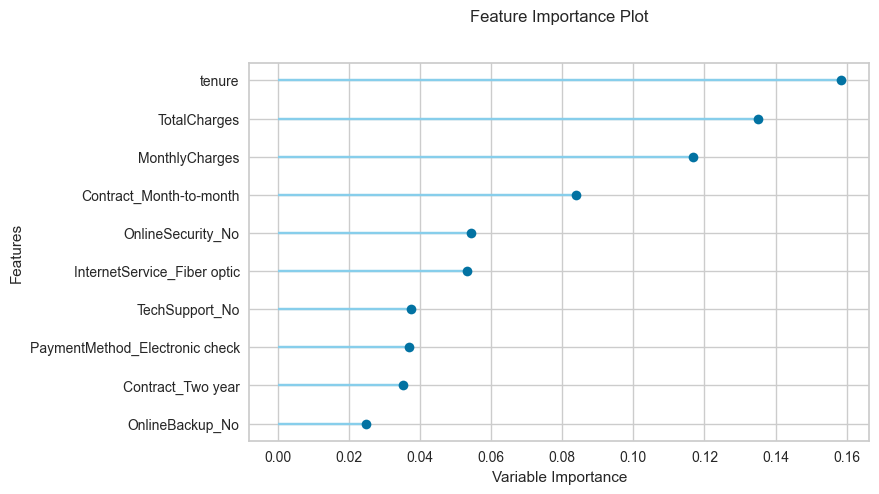

In [65]:
# Feature importance plot
plot_model(tuned_best_model, plot = 'feature')

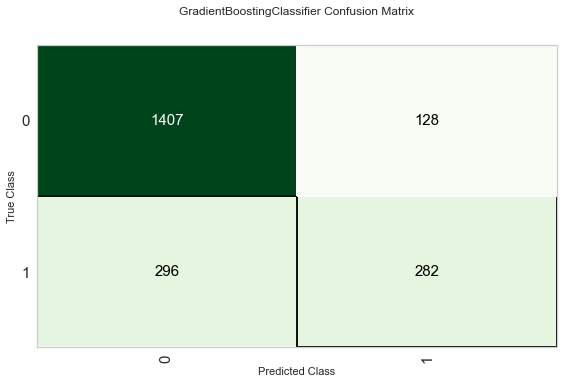

In [66]:
# Confusion Matrix
plot_model(tuned_best_model,plot = 'confusion_matrix')

Now let's look at the confuson matrix
1. This confusion matrix is on the test set which includes 30% of our data (2,113 rows) We have 282 True Positives (13.4%) — these are the customers for which we will be able to extend the lifetime value. If we wouldn’t have predicted, then there was no opportunity for intervention.
2. We also have 128 (6%) False Positives where we will lose money because the promotion offered to these customers will just be an extra cost.
3. 1,388 (66%) are True Negatives (good customers) and 296 (14%) are False Negative (this is a missed opportunity) n

In a churn model, often the reward of True Positives(TP) is way different than the cost of False Positives (FP). Let’s use the following assumptions:

1,000 dollar voucher will be offered to all the customers identified as churn (True Positive + False Positive)

If we are able to stop the churn, we will gain 5,000 dollar in customer lifetime value.

Using these assumptions and the confusion matrix above, we can calculate the $ impact of this model:

TP > 282*5000= 14,10,000

TP+FP > 410*1000 = 4,10,000

##### Difference TP -(TP+FP)= 141000-410000 = 10,00,000

It’s a good model but the problem is it’s not a business-smart model

In order to achieve that we have to train, select, and optimize models using business metrics instead of any conventional metric like AUC or Accuracy

#### Adding a custom metric in pycaret

In [67]:
# create a custom function
def calculate_profit(y, y_pred):
    tp = np.where((y_pred==1) & (y==1), (5000-1000), 0)
    fp = np.where((y_pred==1) & (y==0), -1000, 0)
    return np.sum([tp,fp])
# add metric to PyCaret
add_metric('profit', 'Profit', calculate_profit)

Name                                                            Profit
Display Name                                                    Profit
Score Function       <function calculate_profit at 0x000001F78BD83AF0>
Scorer                                   make_scorer(calculate_profit)
Target                                                            pred
Args                                                                {}
Greater is Better                                                 True
Multiclass                                                        True
Custom                                                            True
Name: profit, dtype: object

In [68]:
# compare all models
best_model = compare_models(sort='Profit')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit,TT (Sec)
nb,Naive Bayes,0.7446,0.8323,0.7800,0.5083,0.6154,0.4368,0.4593,305300.0000,0.0150
lda,Linear Discriminant Analysis,0.8020,0.8400,0.5585,0.6405,0.5963,0.4660,0.4682,247800.0000,0.0210
lr,Logistic Regression,0.8057,0.8475,0.5500,0.6544,0.5973,0.4705,0.4738,246300.0000,0.5250
ada,Ada Boost Classifier,0.8016,0.8472,0.5337,0.6486,0.5851,0.4564,0.4605,238000.0000,0.1180
gbc,Gradient Boosting Classifier,0.8032,0.8481,0.5167,0.6592,0.5791,0.4532,0.4590,232200.0000,0.3310
lightgbm,Light Gradient Boosting Machine,0.7976,0.8382,0.5213,0.6404,0.5746,0.4435,0.4477,231200.0000,0.1390
ridge,Ridge Classifier,0.8030,0.0000,0.5120,0.6609,0.5764,0.4508,0.4575,230300.0000,0.0170
catboost,CatBoost Classifier,0.8012,0.8438,0.5074,0.6561,0.5721,0.4454,0.4517,227600.0000,2.4360
xgboost,Extreme Gradient Boosting,0.7848,0.8264,0.5105,0.6062,0.5539,0.4135,0.4164,220700.0000,0.5960
rf,Random Forest Classifier,0.7953,0.8316,0.4942,0.6431,0.5585,0.4283,0.4349,219600.0000,0.2820


surprisingly Naive Bayes which is a pretty bad model in terms of AUC is the best model when it comes to profit. Let’s see how:

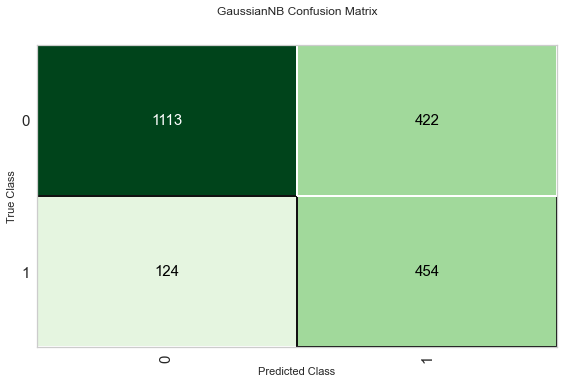

In [69]:
# confusion matrix
plot_model(best_model, plot = 'confusion_matrix')

The total number of customers is still the same (2,113 customers in the test set), what’s changed is now how the model is making errors over false positives and false negatives.

Let’s put some $ value against it, using the same assumptions (as above):

TP > 454*5000= 2,270,000

TP+FP > 876*1000 = 8,76,000

##### Difference TP -(TP+FP)= 2270000-876000 = 13,94,000

#### We have just increased profit by 3,94,000 dollars with a model that does around 2 % less in AUC than the best model

AUC or any other out-of-the-box classification metric (Accuracy, Recall, Precision, F1, Kappa, etc.) is not a business-smart metric, so it does not take into account the risk and reward proposition.
Adding a custom metric and using it for model selection or optimization is a great idea and right way to proceed

In [76]:
# creating the model
nb = create_model('nb')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,Profit
0,0.7444,0.8140,0.7907,0.5075,0.6182,0.4395,0.4640,309000.0000
1,0.7505,0.8261,0.7752,0.5155,0.6192,0.4446,0.4651,306000.0000
2,0.7099,0.7899,0.7132,0.4646,0.5627,0.3598,0.3783,262000.0000
3,0.7586,0.8474,0.7984,0.5255,0.6338,0.4650,0.4876,319000.0000
4,0.7343,0.8280,0.7907,0.4951,0.6090,0.4234,0.4500,304000.0000
5,0.7444,0.8581,0.7984,0.5074,0.6205,0.4419,0.4677,312000.0000
6,0.7444,0.8410,0.7984,0.5074,0.6205,0.4419,0.4677,312000.0000
7,0.7688,0.8549,0.7984,0.5393,0.6437,0.4819,0.5023,324000.0000
8,0.7505,0.8435,0.7597,0.5158,0.6144,0.4398,0.4578,300000.0000
9,0.7404,0.8197,0.7769,0.5050,0.6121,0.4299,0.4525,305000.0000


In [71]:
# save a model
save_model(nb,'model_001')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['customerID'],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Churn',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 nu...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='Churn')),
                 ('fix_perfect', Remove_100(target='Churn'

In [75]:
nb_saved = load_model('model_001')

Transformation Pipeline and Model Successfully Loaded


In [73]:
data_dummies.to_csv('tel_churn.csv')